In [ ]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK resources (run only once)
nltk.download('punkt')
nltk.download('stopwords')

# Tweet data (upload dataset)
df = pd.read_csv("elon_musk_tweets.csv")
tweets = df['text']

# Function to clean and preprocess text
def clean_text(text):
    # Remove mentions, hashtags, and special characters
    text = re.sub(r"@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|[^A-Za-z\s]", "", text)
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing and removing punctuation
    tokens = [token.lower() for token in tokens if token not in string.punctuation]
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

# Clean and preprocess each tweet
cleaned_tweets = [clean_text(tweet) for tweet in tweets]

# Display cleaned tweets
for tweet, cleaned_tweet in zip(tweets, cleaned_tweets):
    print(f"Original tweet: {tweet}")
    print(f"Cleaned tweet: {cleaned_tweet}")


In [ ]:
# Function for stemming
def stem_text(tokens):
    # Initialize the Porter stemmer
    porter = PorterStemmer()
    # Stem each token in the list
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return stemmed_tokens

# Display cleaned tweets and stemmed tokens
for tweet, cleaned_tweet in zip(tweets, cleaned_tweets):
    print(f"Original tweet: {tweet}")
    print(f"Cleaned tweet: {cleaned_tweet}")
    # Tokenization for stemmed tokens
    stemmed_tokens = word_tokenize(cleaned_tweet)
    # Stemming
    stemmed_tokens = stem_text(stemmed_tokens)
    print(f"Stemmed tokens: {stemmed_tokens}")
    print()

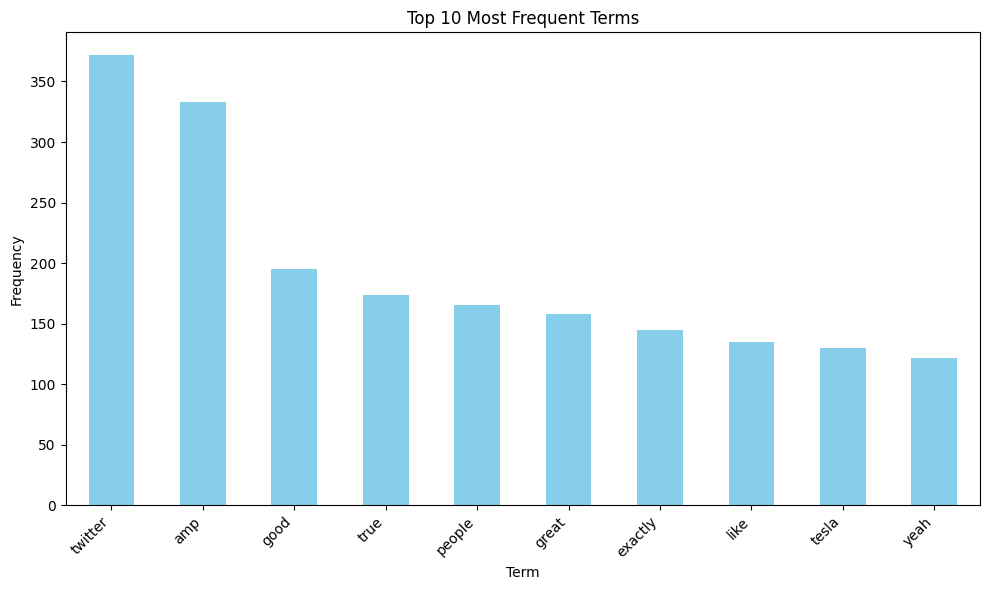

In [ ]:
# Create term-document matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_tweets)

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# Convert sparse matrix to DataFrame
df = pd.DataFrame(X.toarray(), columns=terms, index=tweets)

# Calculate total frequency of each term across all tweets
term_frequencies = df.sum(axis=0)

# Sort terms by frequency and select the top N terms
N = 10  # Number of top terms to display
top_terms = term_frequencies.nlargest(N)

# Plot top N terms
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Terms')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


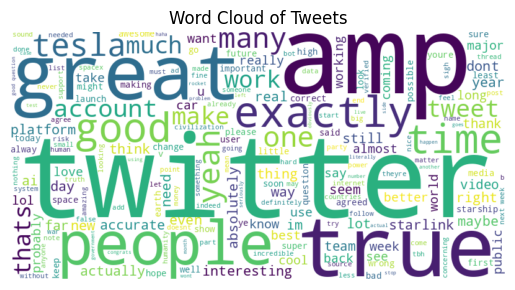

In [ ]:
from wordcloud import WordCloud

# Join all cleaned tweets into a single string
all_cleaned_tweets = ' '.join(cleaned_tweets)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_tweets)

# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets')
plt.axis('off')
plt.show()

In [ ]:
# Sentiment Analysis
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer


# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each tweet
sentiments = []
for tweet in tweets:
    sentiment_score = sia.polarity_scores(tweet)
    sentiments.append(sentiment_score)

# Print sentiment scores for each tweet
for i, sentiment in enumerate(sentiments, 1):
    print(f"Tweet {i}: {sentiment}")


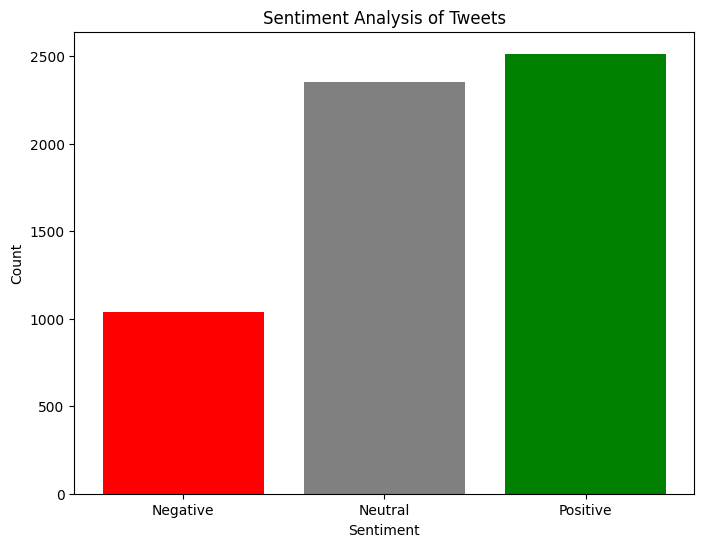

In [ ]:
# Visualization
compound_scores = [sentiment['compound'] for sentiment in sentiments]

# Define labels for the sentiment categories
labels = ['Negative', 'Neutral', 'Positive']

# Categorize the compound sentiment scores into negative, neutral, and positive
sentiment_categories = ['Negative' if score < 0 else 'Neutral' if score == 0 else 'Positive' for score in compound_scores]

# Count the occurrences of each sentiment category
sentiment_counts = {label: sentiment_categories.count(label) for label in labels}

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['red', 'gray', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis of Tweets')
plt.show()

<ipython-input-8-87463c239d50>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tweet_lengths, bins=20, kde=True, color='skyblue')


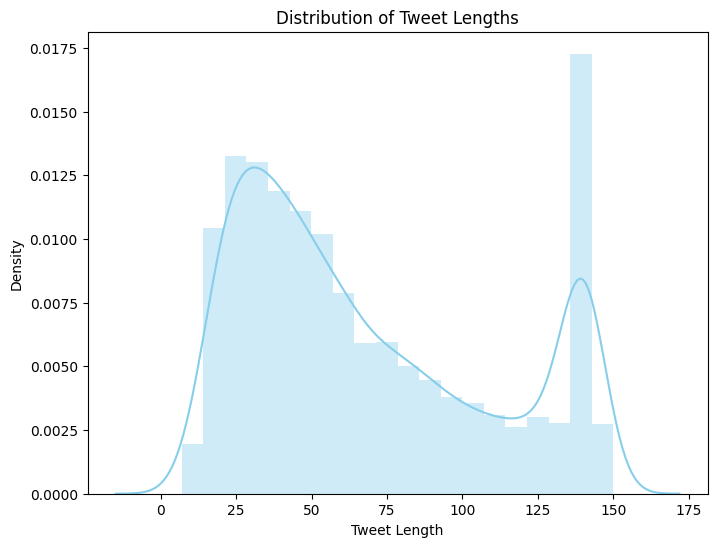

In [ ]:
import seaborn as sns

# Histogram of Tweet Lengths
tweet_lengths = [len(tweet) for tweet in tweets]
plt.figure(figsize=(8, 6))
sns.distplot(tweet_lengths, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.show()

<ipython-input-9-d50766669552>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_words, bins=10, kde=True, color='salmon')


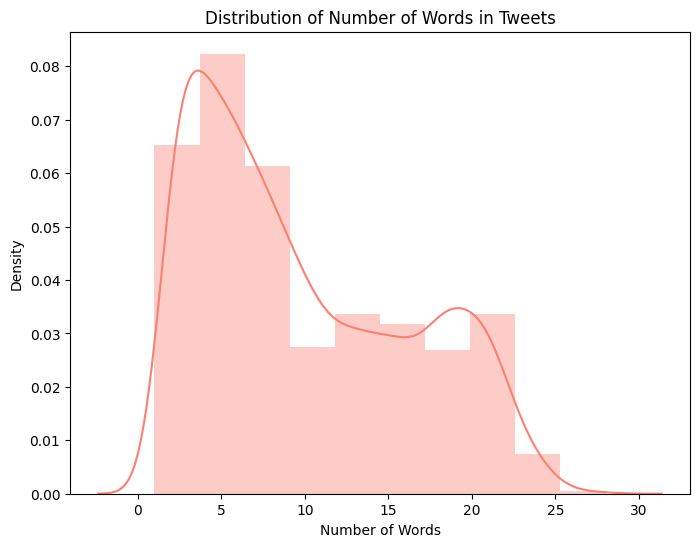

In [ ]:
# Distribution of Number of Words
num_words = [len(tweet.split()) for tweet in tweets]
plt.figure(figsize=(8, 6))
sns.distplot(num_words, bins=10, kde=True, color='salmon')
plt.title('Distribution of Number of Words in Tweets')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.show()

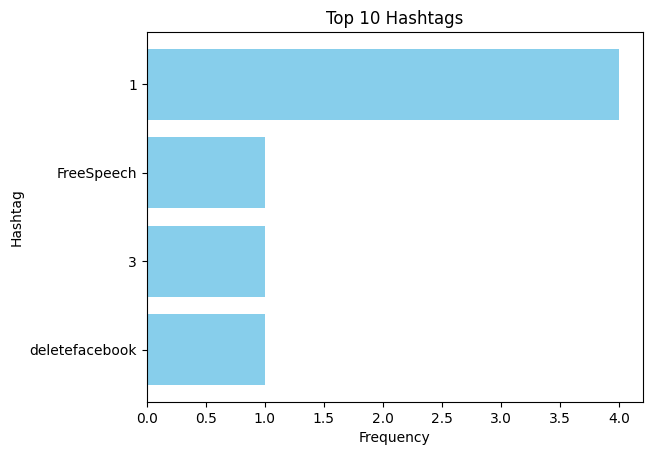

In [ ]:
# Extract hashtags from the tweets
hashtags = re.findall(r'#(\w+)', ' '.join(tweets))

# Count the frequency of each hashtag
hashtag_freq = {}
for hashtag in hashtags:
    if hashtag in hashtag_freq:
        hashtag_freq[hashtag] += 1
    else:
        hashtag_freq[hashtag] = 1

# Sort the hashtags by frequency and select the top N
top_hashtags = sorted(hashtag_freq.items(), key=lambda x: x[1], reverse=True)[:N]

# Extract top hashtags and their frequencies
top_hashtags, frequencies = zip(*top_hashtags)

# Visualize the top N hashtags
plt.figure()
plt.barh(range(len(top_hashtags)), frequencies, color='skyblue')
plt.yticks(range(len(top_hashtags)), top_hashtags)
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.title(f'Top {N} Hashtags')
plt.gca().invert_yaxis()  # Invert y-axis to display highest frequency at the top
plt.show()
